# NHTS Vehicle Type EDA

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
vehicles = pd.read_csv("vehpub.csv")
pd.set_option('display.max_columns', None)
vehicles.head(5)

,HOUSEID,VEHID,VEHYEAR,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,HFUEL,VEHOWNED,VEHOWNMO,ANNMILES,HYBRID,PERSONID,TRAVDAY,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,WTHHFIN,BESTMILE,BEST_FLG,BEST_EDT,BEST_OUT,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF
0,30000007,1,2007,10,49,49032,1,1,3,69000,-1,1,-1,1000,2,3,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.31432,14611.926637,1,-1,4,T,50,1500,750,750,20,750,300,487.064221,1126.457778,30,-9,2.31275,1
1,30000007,2,2004,13,49,49442,1,2,-8,164000,-1,1,-1,2500,2,-8,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.31432,4767.090946,3,-1,-1,T,50,1500,750,750,20,750,300,250.899523,580.267873,19,-9,2.31275,1
2,30000007,3,1998,19,19,19014,1,1,1,120000,-1,1,-1,900,2,1,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.31432,8000.324552,1,-1,-1,T,50,1500,750,750,20,750,300,444.462475,1027.930589,18,-9,2.31275,1
3,30000007,4,1997,20,19,19021,1,1,2,-88,-1,1,-1,500,2,2,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.31432,725.932347,2,-1,-1,T,50,1500,750,750,20,750,300,40.329575,93.272224,18,-9,2.31275,1
4,30000007,5,1993,24,20,20481,1,4,2,300000,-1,1,-1,10000,2,2,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.31432,12437.658757,1,-1,-1,T,50,1500,750,750,20,750,300,888.404197,2054.656806,14,-9,2.31275,1


In [106]:
vehicles.columns

Index(['HOUSEID', 'VEHID', 'VEHYEAR', 'VEHAGE', 'MAKE', 'MODEL', 'FUELTYPE',
       'VEHTYPE', 'WHOMAIN', 'OD_READ', 'HFUEL', 'VEHOWNED', 'VEHOWNMO',
       'ANNMILES', 'HYBRID', 'PERSONID', 'TRAVDAY', 'HOMEOWN', 'HHSIZE',
       'HHVEHCNT', 'HHFAMINC', 'DRVRCNT', 'HHSTATE', 'HHSTFIPS', 'NUMADLT',
       'WRKCOUNT', 'TDAYDATE', 'LIF_CYC', 'MSACAT', 'MSASIZE', 'RAIL', 'URBAN',
       'URBANSIZE', 'URBRUR', 'CENSUS_D', 'CENSUS_R', 'CDIVMSAR', 'HH_RACE',
       'HH_HISP', 'HH_CBSA', 'SMPLSRCE', 'WTHHFIN', 'BESTMILE', 'BEST_FLG',
       'BEST_EDT', 'BEST_OUT', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN', 'HTRESDN',
       'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN', 'GSYRGAL', 'GSTOTCST',
       'FEGEMPG', 'FEGEMPGA', 'GSCOST', 'FEGEMPGF'],
      dtype='object')

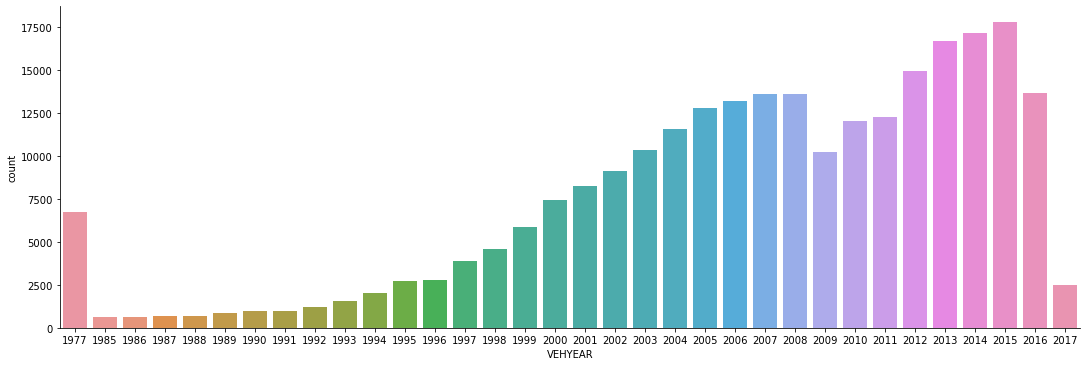

In [107]:
sns.catplot(data=vehicles[vehicles['VEHYEAR'] >= 0], kind='count', x='VEHYEAR', aspect=3)

Pretty steady increase in vehicle data year by year with a couple of exceptions. There seems to be a big gap between 1977 and 1985, with an unusually high amount of cars registered in 1977. Vehicle ownership seems to have gone down in 2009 post financial crisis as well.

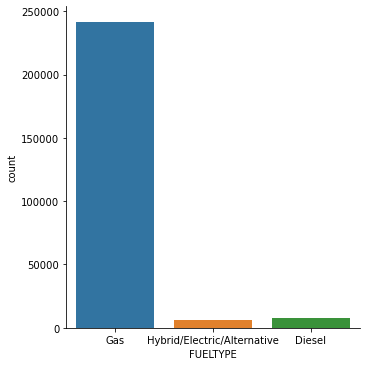

In [108]:
vehicles['FUELTYPE'] = vehicles['FUELTYPE'].replace({1: 'Gas',
                                                    2: 'Diesel',
                                                    3: 'Hybrid/Electric/Alternative',
                                                    4: 'Other'})
fuel_types = ['Gas', 'Diesel', 'Hybrid/Electric/Alternative', 'Other']
sns.catplot(data=vehicles[vehicles['FUELTYPE'].isin(fuel_types)], kind='count', x='FUELTYPE')

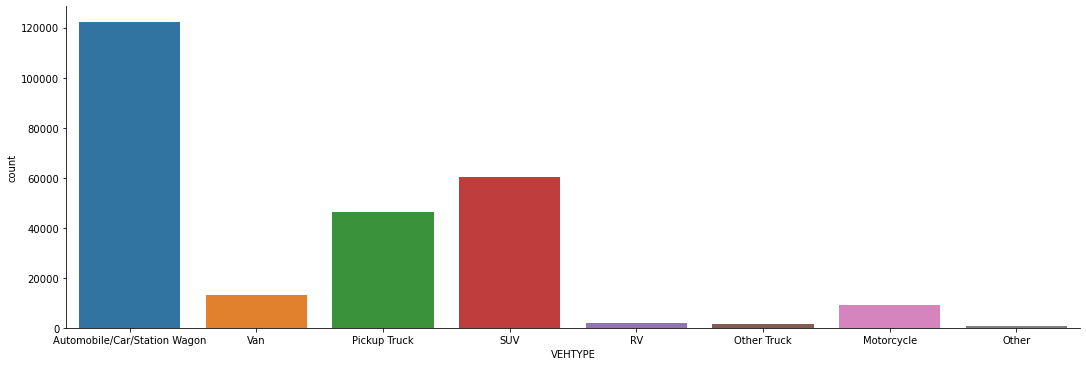

In [110]:
vehicles['VEHTYPE'] = vehicles['VEHTYPE'].replace({1: 'Automobile/Car/Station Wagon',
                                                    2: 'Van',
                                                    3: 'SUV',
                                                    4: 'Pickup Truck',
                                                    5: 'Other Truck',
                                                    6: 'RV',
                                                    7: 'Motorcycle',
                                                    97: 'Other'})
veh_types = ['Automobile/Car/Station Wagon', 'Van', 'SUV', 'Pickup Truck', 'Other Truck', 'RV', 'Motorcycle', 'Other']
sns.catplot(data=vehicles[vehicles['VEHTYPE'].isin(veh_types)], kind='count', x='VEHTYPE', aspect=3)

<AxesSubplot:xlabel='VEHYEAR', ylabel='ANNMILES'>

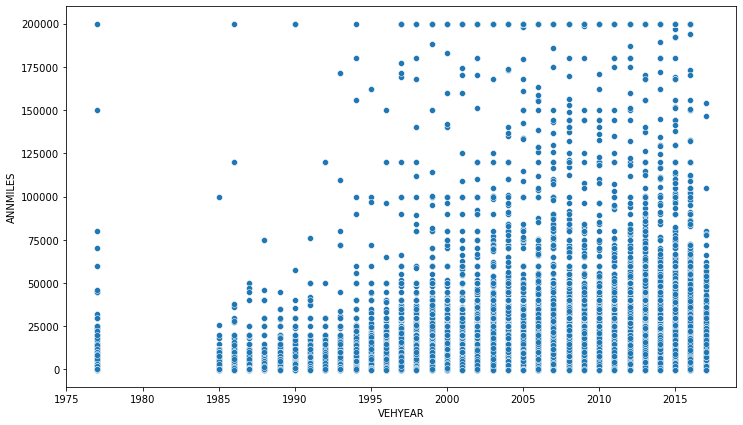

In [112]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[(vehicles['VEHYEAR'] >= 0) & (vehicles['VEHTYPE'].isin(veh_types))], x='VEHYEAR', y='ANNMILES')

<AxesSubplot:xlabel='VEHYEAR', ylabel='BESTMILE'>

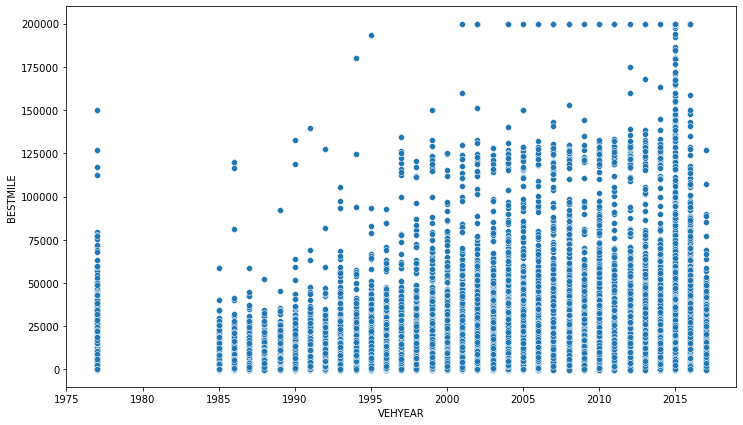

In [113]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[vehicles['VEHYEAR'] >= 0], x='VEHYEAR', y='BESTMILE')

<AxesSubplot:xlabel='ANNMILES', ylabel='BESTMILE'>

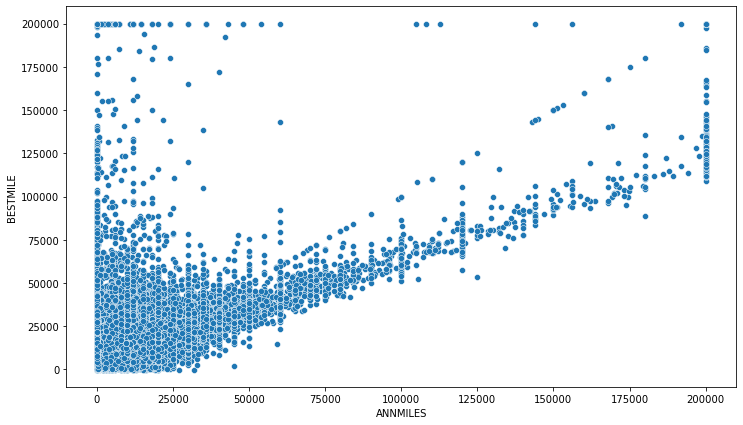

In [114]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[vehicles['VEHYEAR'] >= 0], x='ANNMILES', y='BESTMILE')

***Not sure what the difference is between "ANNMILES" & "BESTMILE". Correlation shown above.*** <br>
ANNMILES - Self-reported annualized mile estimate. <br>
BESTMILE - Best estimate of annual miles.

Text(0.5, 1.0, 'Annual Gas Consumption by Area Classification')

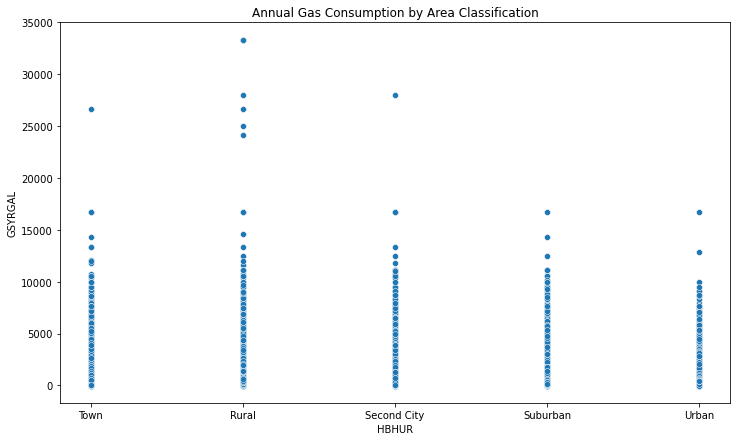

In [124]:
hbhur = ['Town', 'Rural', 'Second City', 'Suburban', 'Urban']
vehicles['HBHUR'] = vehicles['HBHUR'].replace({'T': 'Town',
                                               'R': 'Rural',
                                               'C': 'Second City',
                                               'S': 'Suburban',
                                               'U': 'Urban'})
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[vehicles['HBHUR'].isin(hbhur)], x='HBHUR', y='GSYRGAL').set_title('Annual Gas Consumption by Area Classification')

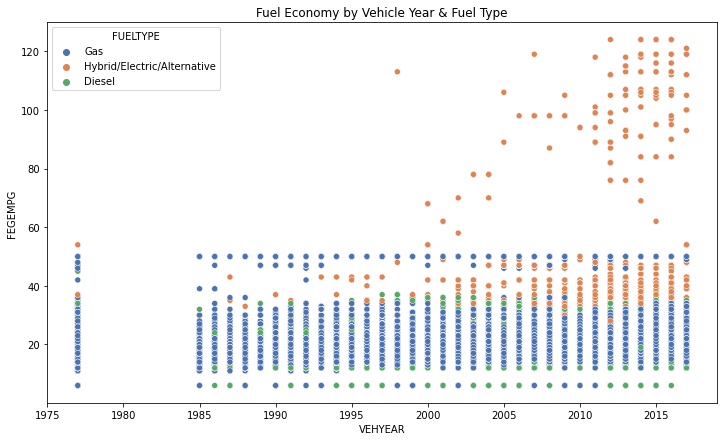

In [118]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[(vehicles['VEHYEAR'] >= 0) & (vehicles['FUELTYPE'].isin(fuel_types))], x='VEHYEAR', y='FEGEMPG', hue='FUELTYPE', palette='deep').set_title('Fuel Economy by Vehicle Year & Fuel Type')

Text(0.5, 1.0, 'Fuel Economy by Odomoter Reading & Fuel Type')

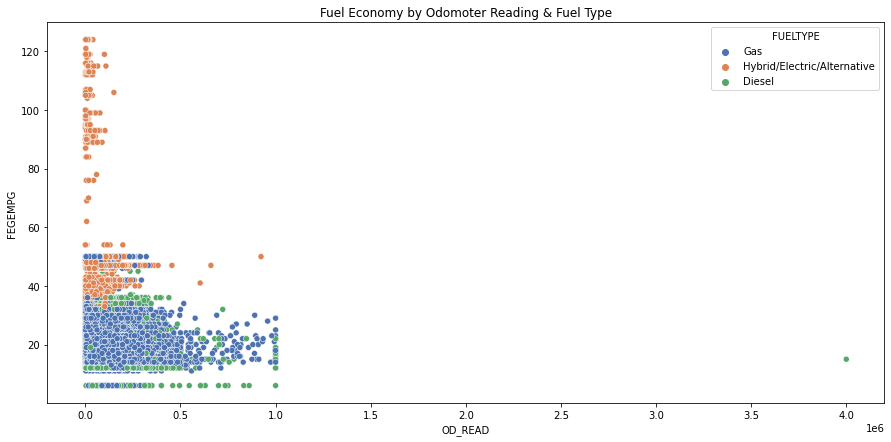

In [119]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=vehicles[(vehicles['OD_READ'] >= 0) & (vehicles['FUELTYPE'].isin(fuel_types))], x='OD_READ', y='FEGEMPG', hue='FUELTYPE', palette="deep").set_title('Fuel Economy by Odomoter Reading & Fuel Type')

Text(0.5, 1.0, 'Annual Fuel Cost by Vehicle Year & Fuel Type')

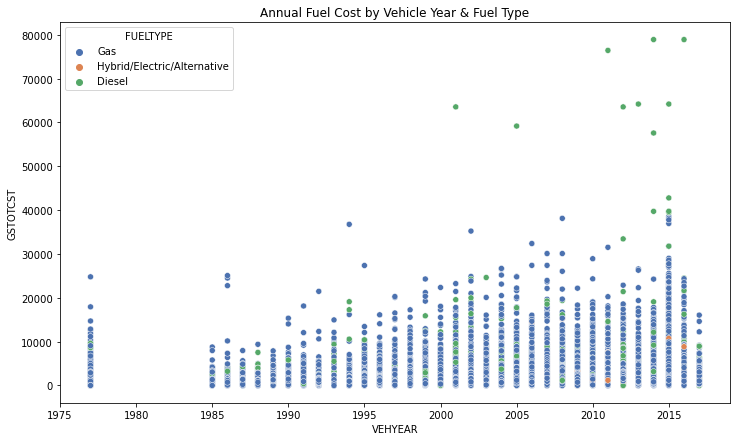

In [120]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[(vehicles['VEHYEAR'] >= 0) & (vehicles['FUELTYPE'].isin(fuel_types))], x='VEHYEAR', y='GSTOTCST', hue='FUELTYPE', palette="deep").set_title('Annual Fuel Cost by Vehicle Year & Fuel Type')